<p align="center">
  <img src="img/GMITLOGO.jpg" width="500"/></p>

# GMIT, H.Dip in Data Analytics, Fundamentals of Data Analysis Assignment 2018

## 1. Introduction

This repository contains all of the files pertaining to my 2018 assignment submission for the Fundamentals of Data 
Analysis module of the GMIT H.Dip program in Data Analytics. All of the work within this repository was carried out over the course of a 4 week period in October and November 2018. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objectives

The objective of the assignement is to carry out some research into the "Anscombe's Quartet" data set[2]. The data set is to be analysed in this notebook. There are four main tasks in the assignment[3]:

1. Explain the background to the dataset – who created it, when it was created, and any speculation you can find regarding how it might have been created.
1. Plot the interesting aspects of the dataset.
1. Calculate the descriptive statistics of the variables in the dataset.
1. Explain why the dataset is interesting, referring to the plots and statistics above.


## 2. Background to the Anscombe's Quartet Data Set

The Anscombe Quartet data set was first published by Francis Anscombe in 1973 [5]. Anscombe was a British statistician who studied maths at Cambridge and worked for the Ministry of Supply during World War 2 on statistical issues relating to quality control. Following the war he returned to Cambridge where he was active in statistical research. In 1955 he moved to moved to America where he worked at both Princeton and Yale. It was at Yale where he developed an interst in statistical computing, where he drew upon his background in sampling of inspections for industrial quality control, the foundations of probability and analysis of variance [6]. He published a text on the subject "Computing in Statistical Science Through APL". (APL - A Programming Language!)  

<p align="center">
  <img src="img/anscombe.jpeg" width="200" /></p>
 <p style="text-align: center;"> <b><I>Frank Anscombe</I></b> </p>  
  
 Anscombe cautioned against misdiagnosis and the misapplication of computer models, without fully understanding a data set. To this end he created the Anscombe's Quartet data set to demonstrate 4 completely different functions which all have the same underlying descriptive statistics (mean, standard deviation, linear regression line etc.), but when plotted - they can be seen to be completely different. At the time that the data set was developed, many statisticians believed that graphs were imprecise and that descritive statistics were a better way to fully define what was going on in a set of data. Anscombe disagreed with this and created the quartet to show the benefits of data visualisation believeing that both descriptive data and graphs contributed to the understanding of a data set.
 
 Anscombe never documented how he came up with the data sets, so it has been left to speculation as to how he did it. According to Matejka and Fitzmaurice, the effectiveness of the quartet is not just that the 4 data sets have similar descriptive statistics, rather that they have similar descriptive statistics *and* that they are so very distinct visually. In their paper titled "*Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing*" [7] - they illustarted this point using the graphic shown below:
 
 <p align="center">
  <img src="img/img2.png" width="700" /></p>
  
  In Anscombe's Quartet on the left, the 4 data sets are strikingly different, whereas in the unstructured data set on the right they are visually similar. In this paper, the researchers looked to create an algorithm for generating such data sets as Anscombe's. They believed that while it is relatively difficult to create a new data set from scratch that had similar descritive statistics but was very different visually, it would be relatively easy to take an existing data set and modify it slightly while maintaining those statistical properties. 
  
 Matejka and Fitzmaurice designed an iterative algorithm that would take an existing data set and modify it slighly each time, checking that the descriptive statistics were still the same. Adrian Coyler [8] has posted and excellent explaination of how this was carried out [here](https://blog.acolyer.org/2017/10/31/same-stats-different-graphs-generating-datasets-with-varied-appearance-and-identical-statistics-through-simulated-annealing/). Coyler explains the algorithm used in psuedocode as follows:
   
   <p align="center">
  <img src="img/img3.png" width="450" /></p>
  
 
 Where:
 * *Initial_ds* is the original dataset
 * *Perturb* is a function that modifies the original data set slightly in a random way, note that it has a temp parameter - which represents a tempterature used in *Simulated Annealing*
 * The *Fit* function checks whether on not the *Perturb* function has improved the overall fitness and accepts or rejects the perturbation as appropriate
 * The newly return Perturbation is checked to see if the statistical properties are similar (as defined to within 2 decimal places) and if so the test data set becomes the current data set until the next iteration
 
 When carrying out iterative optimisations such as this there is always a risk that the alogorithm will being to converge around a good solution (a local optimum) that isn't the best solution (the global optimum)[9]. One method to try and prevent this is called *Simulated Annealing*. This is named after the metalugic principle of annelaing method whereby the crystalline structure in the metal changes gradually as heated metal cools down. As the temperature of the metal cools slowly, the crystals are allowed to grow in size resulting in a tougher material. Simulated annealing introduces a temperature variable to the algorithm. This variable is initially set high and allowed to "cool" as the algorithm runs more times. The algorithm is designed in such a way that it allows worse solutions and these are accepted based on the value of the temp variable. As the temperature of the algorithm reduces so does the chance of a worse solution being accepted. But the principle allows the alogorithm to shake itself out of possiblt converging around the wrong optimum.  
 
  In order to ensure that the resulting plots are visually distinct they created some biases in the random modifications to move the points towards some prefered shapes. In the course of this reseach the team were able to move data poins from a dinosaur shape through many others such as X's, straight lines and ovals. Examples of how the data set developed are shown here [8]:
  
 <p align="center">
  <img src="img/img4.png" width="450" /></p>
  
  It is possible that Anscombe used a similar method while creating his dataset. 

## 3. Plots of the Anscombe's Data Sets

In this section, quartet of data sets will be analysed by use of visual plots. 
Before analysing the data set it must first be downloaded. It is widely available on the internet, for this assignment it was downloaded from [here] (https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/anscombe.csv).Note that the data set was modified slightly to remove a column which contained point numbers. The plots will be created using the subplot function of the matplotlib library [10] for Python. The first step is to import the required libraries.

In [2]:
# Import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# Import stats to calculate the properties of the best fit line in the data sets
from scipy import stats

The next step is to load the data set. 

In [3]:
# Load the data set from the local .csv file
df = pd.read_csv('data/anscombes.csv')
# Print the data set to ensure that it has loaded properly
print(df)

    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


The data set has been loaded and checked, so the next step is to plot the data. While researching how this is to be done, I discovered style sheets in matplotlib which can be used to make the plot look a bit more modern. I used the *ggplot* style (recommended in the documentation)[11] to format the grids in the plots. I also used stackoverflow to learn how to resize the subplots as the defaults were quite small and hard to read [12]. Then, I learned how to plot the linear regression lines using the *stats* module from the *scipy* package [13]. Finally, I rewrote the code using a function for the subplots to tidy up the code and halving the number of lines required.

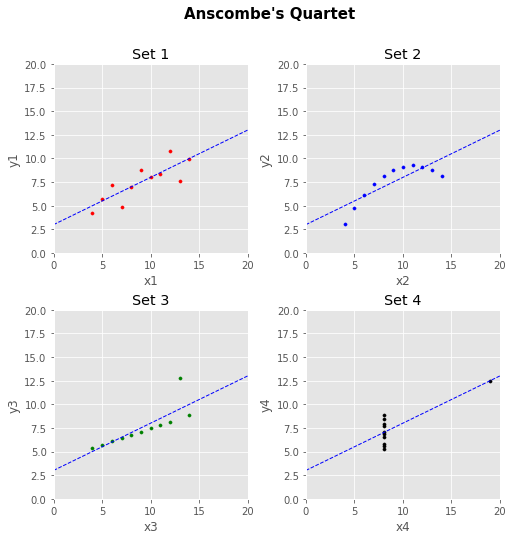

In [11]:
# Add a title to the plot
plt.suptitle("Anscombe's Quartet", fontsize=15, fontweight='bold')
# Tidy up the plots - use more modern formatting (https://matplotlib.org/users/style_sheets.html)
plt.style.use('ggplot')

# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [8, 8]

# Define a function to create a 2 x 2 subplot and call it for each plot in the quartet
def sub_plot2x2(x, y, pos, title, colour):
    # Plot Set 1
    plt.subplot(2, 2, pos, xlim=(0,20), ylim=(0,20), xlabel=(x), ylabel=(y), title=title)
    plt.scatter(df[x], df[y],c=colour, label=title, s=10)
    plt.grid(True)
    # Calculate the linear statistics using stats.linregress()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])
    # Create a range of x values from 0 to 20 (the size of the plot)
    x_vals = np.arange(0,20.1,0.1)
    # Calculate the y values using the slope and intercept calculted
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, 'b-', linestyle='dashed',linewidth=1)

sub_plot2x2('x1', 'y1', 1, 'Set 1', 'red')  
sub_plot2x2('x2', 'y2', 2, 'Set 2', 'blue')
sub_plot2x2('x3', 'y3', 3, 'Set 3', 'green')
sub_plot2x2('x4', 'y4', 4, 'Set 4', 'black')

# Format the spacing between the 4 plots 
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

As demonstarted above - even though the 4 data sets are very different visually, the best fit line for the 4 data sets is exactly the same!

## 4. Calculation of the Descriptive Statistics

## 5. Discussion and Conclusions

## References

[1] Project Jupyter. Project Jupyter Home. (_https://www.jupyter.org/_)  
[2] Math Warehouse. What is Anscombes Quarter in Statistics? (_https://www.mathwarehouse.com/statistics/what-is-anscombes-quartet.php_)  
[3] Dr. Ian McLoughlin. GMIT. Assignment 2018: Fundamentals of Data Analysis (_https://github.com/ianmcloughlin/assignment-2018-fundda/raw/master/assignment.pdf_)  
[4] R data sets. Anscombe’s quartet of identical simple linear regressions. (_https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/anscombe.csv_)   
[5] Royal Statistical Society. Obituaries - Frank Ascombe (_https://rss.onlinelibrary.wiley.com/doi/full/10.1046/j.0039-0526.2003.02064.x_)    
[6] Wolfgang Saxon. New York Time Obituary (_https://www.nytimes.com/2001/10/25/nyregion/francis-john-anscombe-83-mathematician-and-professor.html_)  
[7] Justin Matejka, George Fitzmaurice. Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. (_https://www.autodeskresearch.com/publications/samestats_)  
[8] Adrian Coyler. The Morning Paper: Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing. (_https://blog.acolyer.org/2017/10/31/same-stats-different-graphs-generating-datasets-with-varied-appearance-and-identical-statistics-through-simulated-annealing/_)  
[9] Lee Jacobson. The Problem Spot: Simulate Annealing for Beginners (_http://www.theprojectspot.com/tutorial-post/simulated-annealing-algorithm-for-beginners/6_)   
[10] Matplotlib Development Team. matplotlib.pyplot.subplots. (*https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html*)   
[11] Matplotlib Development Team. Customising plots with style sheets. (*https://matplotlib.org/users/style_sheets.html*)   
[12] Stackoverflow. How to make inline plots in Jupyter Notebook larger? (*https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger*)  
[13] www.plot.ly. Linear Fit in Matplotlib. (*https://plot.ly/matplotlib/linear-fits/*)

# DONT FORGET TO UPDATE THE README.md FILE!!